C:\Users\petre\AppData\Local\Temp\ipykernel_11432\420124108.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[columns_to_map] = df_selected[columns_to_map].replace({"Ano": 1, "Ne": 0})
C:\Users\petre\AppData\Local\Temp\ipykernel_11432\420124108.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["pohlavi"] = df_selected["pohlavi"].replace({"Zena": 0, "Muz": 1})


Epoch 1/10
19/19 [==============================] - 2s 15ms/step - loss: 0.6916 - accuracy: 0.5248 - val_loss: 0.6796 - val_accuracy: 0.5909
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5983 - val_loss: 0.6711 - val_accuracy: 0.5606
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6171 - val_loss: 0.6613 - val_accuracy: 0.5455
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6274 - val_loss: 0.6611 - val_accuracy: 0.5455
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6393 - val_loss: 0.6600 - val_accuracy: 0.5606
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6513 - val_loss: 0.6528 - val_accuracy: 0.5455
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6581 - val_loss: 0.6524 - val_accuracy: 0.5758
Epoch 8/10
19/19 [=

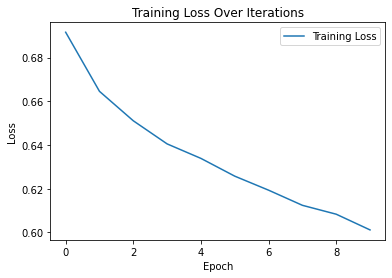

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("df1.csv", encoding='latin1')
df["skupina"] = df["skupina"].replace({"otevrena": 1, "laparoskopicka": 0})


# Select the specified variables
selected_vars = ["vek", "BMI", "pohlavi", "DM", "ASA", "HT", "Arytmie", "CMP",
                 "Renalni", "POP", "ICHS", "stadium", "cas.preziti", "zije"]

# Extract only the selected variables and the target variable
df_selected = df[selected_vars + ["skupina"]]

# Replace 'Ano' with 1 and 'Ne' with 0 in specific columns
columns_to_map = ["ICHS", "HT", "CMP", "DM", "Renalni"]
df_selected[columns_to_map] = df_selected[columns_to_map].replace({"Ano": 1, "Ne": 0})
df_selected["pohlavi"] = df_selected["pohlavi"].replace({"Zena": 0, "Muz": 1})
# Drop rows with missing values in the selected variables
df_selected = df_selected.dropna()

# Separate features (X) and target variable (y)
X = df_selected.drop("skupina", axis=1)
y = df_selected["skupina"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Initialize a list to store the loss values
loss_history = []

# Custom callback to record loss values during training
class LossHistoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss_history.append(logs['loss'])

# Train the model with the LossHistoryCallback
history_callback = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[LossHistoryCallback()])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)

# Plot the objective function (loss) over iterations
plt.plot(history_callback.epoch, loss_history, label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\petre\AppData\Local\Temp\ipykernel_11432\2055334745.py:68: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


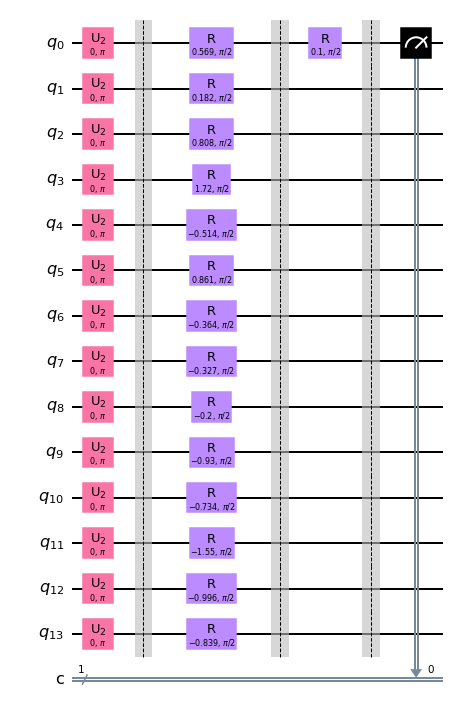

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select the specified variables
selected_vars = ["vek", "BMI", "pohlavi", "DM", "ASA", "HT", "Arytmie", "CMP",
                 "Renalni", "POP", "ICHS", "stadium", "cas.preziti", "zije"]

# Extract only the selected variables and the target variable
df_selected = df[selected_vars + ["skupina"]]

# Replace 'Ano' with 1 and 'Ne' with 0 in specific columns
columns_to_map = ["ICHS", "HT", "CMP", "DM", "Renalni"]
df_selected.loc[:, columns_to_map] = df_selected[columns_to_map].replace({"Ano": 1, "Ne": 0})

# Replace 'Muz' with 1 and 'Zena' with 0 in the 'pohlavi' column
df_selected.loc[:, "pohlavi"] = df_selected["pohlavi"].replace({"Muz": 1, "Zena": 0})

# Drop rows with missing values in the selected variables
df_selected = df_selected.dropna()

# Separate features (X) and target variable (y)
X = df_selected.drop("skupina", axis=1)
y = df_selected["skupina"]



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Quantum Circuit Parameters
num_qubits = X_train.shape[1]
shots = 1000  # Number of measurements

# Quantum Neural Network (QNN) Circuit
qc = QuantumCircuit(num_qubits, 1)
qc.h(range(num_qubits))
qc.barrier()

# Feature Encoding
for i in range(num_qubits):
    qc.ry(X_train[0, i], i)

qc.barrier()

# Variational Circuit (Ansatz)
qc.ry(0.1, 0)
qc.barrier()

# Measurement
qc.measure(0, 0)

# Transpile the Quantum Circuit
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qc, simulator)

# Execute the Quantum Circuit
qobj = assemble(tqc, shots=shots)
result = simulator.run(qobj).result()

# Plot the results
plot_histogram(result.get_counts(qc))
plt.show()
qc.decompose().draw(output="mpl", fold=20)

In [3]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

features = X
labels = y

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.59
Classical SVC on the test dataset:     0.54


In [4]:
from qiskit.circuit.library import ZZFeatureMap
features = features.iloc[:, :6]
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="text", fold=20)

In [5]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
#ansatz.decompose().draw(output="mpl", fold=20)

In [6]:
train_features = train_features.iloc[:, :4]


In [7]:
test_features = test_features.iloc[:, :4]

In [8]:
train_features = train_features.to_numpy()
train_labels = train_labels.to_numpy()

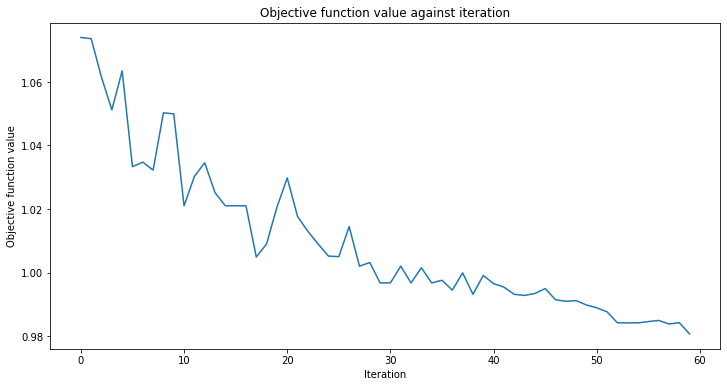

Training time: 823 seconds


In [9]:
num_features = train_features.shape[1]
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=60)

from qiskit.primitives import Sampler

sampler = Sampler()

from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")



In [10]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.58
Quantum VQC on the test dataset:     0.45


In [11]:
import numpy as np

alpha = 1+3j
beta = 2+8j

alphaabs = np.abs(alpha)
betaabs = np.abs(beta)
array = np.zeros((2), dtype=np.complex_)
array[0] = alphaabs
array[1] = betaabs
suma = np.sqrt(np.inner(array,array))
array = array / suma

print(np.inner(array[0],array[0]) + np.inner(array[1],array[1]))

magnitude_squared_sum = abs(array[0])**2 + abs(array[1])**2
print("Magnitude squared sum:", magnitude_squared_sum)

(0.9999999999999998+0j)
Magnitude squared sum: 0.9999999999999998


In [12]:
import numpy as np

def normalize_complex(alpha, beta):
    # Create NumPy arrays from complex numbers
    alpha_np = np.array([alpha])
    beta_np = np.array([beta])

    # Combine alpha and beta into a single array
    complex_array = np.concatenate([alpha_np, beta_np])

    # Calculate the magnitudes
    magnitudes = np.abs(complex_array)
    print(magnitudes)

    # Calculate the normalization factor
    normalization_factor = 1 / np.sqrt(np.sum(magnitudes**2))
    print(normalization_factor)

    # Normalize the complex array
    normalized_array = normalization_factor * complex_array

    # Split the normalized array back into alpha and beta

    return normalized_array

# Example usage:
alpha = 1 # Replace with your complex alpha
beta = 2  # Replace with your complex beta

alpha_normalized, beta_normalized = normalize_complex(alpha, beta)

print("Normalized alpha:", alpha_normalized)
print("Normalized beta:", beta_normalized)

# Verify normalization
magnitude_squared_sum = abs(alpha_normalized)**2 + abs(beta_normalized)**2
print("Magnitude squared sum:", magnitude_squared_sum)


[1 2]
0.4472135954999579
Normalized alpha: 0.4472135954999579
Normalized beta: 0.8944271909999159
Magnitude squared sum: 0.9999999999999999


In [13]:
import json
import numpy as np

def initialize_state():
    q0 = np.array([1,0])
    return q0


def apply_u(U, state):
    Uapply = np.dot(U, state)
    print(Uapply)
    return Uapply


def measure_state(state, num_meas):
    # Your code here #
    prob_0 = np.abs(state[0])**2
    prob_1 = np.abs(state[1])**2

# Perform 20 measurements
    result = np.random.choice([0, 1], size=20, p=[prob_0, prob_1])
    return result


def quantum_algorithm(U):
    # PREPARE THE STATE, APPLY U, THEN TAKE 20 MEASUREMENT SAMPLES
    state = initialize_state()
    state_u = apply_u(U,state)
    measurements = measure_state(state_u,20)
    return measurements
    
U = np.array([[0.70710678, 0.70710678], [0.70710678, -0.70710678]])

out = quantum_algorithm(U)
print(out)


[0.70710678 0.70710678]
[1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1]
